## Import some prerequirement

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Set hyperparameters

In [ ]:
IMG_WIDTH = None
IMG_HEIGHT = None
EPOCHS = None
BATCH_SIZE= None
n_classes = None

## Initialize train and test data

In [ ]:
data = np.load('/content/mnist.npz')
[x_train, y_train, x_test, y_test] = data['x_train'], data['y_train'], data['x_test'], data['y_test']

## Show dataset

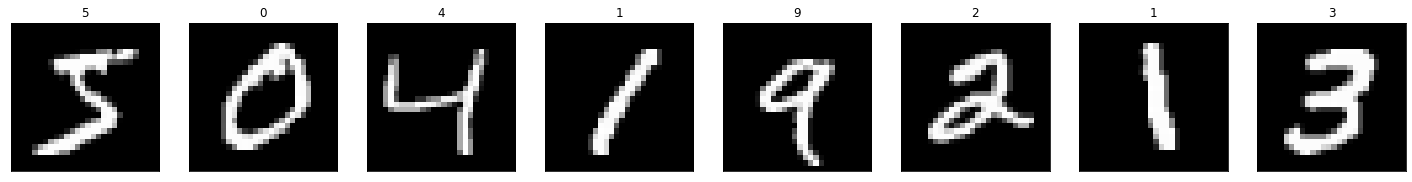

In [ ]:
plt.figure(figsize=(25,4))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(y_train[i])

## Define model

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
def build_model():

  model = Sequential()

  model.add(layers.Input(shape=(28,28)))
  model.add(layers.Flatten())

  model.add(layers.Dense(units=128))
  model.add(layers.Activation('relu'))

  model.add(layers.Dense(units=128))
  model.add(layers.Activation('relu'))

  model.add(layers.Dense(units=128))
  model.add(layers.Activation('relu'))

  model.add(layers.Dense(units=10 , activation='softmax'))

  return model

## Compile and fit model

In [ ]:
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import callbacks

def train_model(optimizer):
  model = build_model()

  # Compile model
  model.compile(
    optimizer = optimizer, 
    loss = categorical_crossentropy,
    metrics = 'accuracy'
  )

  # Fit model
  history = model.fit(
    x_train, 
    y_train, 
    batch_size = 64, 
    epochs = 5,
    validation_split = 0.2,
    callbacks= callbacks.TensorBoard(log_dir='logs/Base')
  )


In [ ]:
from tensorflow.keras.optimizers import SGD , Adam , Adagrad


sgd_optimizer = SGD(learning_rate=0.01 ,name="SGD")
train_model(sgd_optimizer)

# sgd_optimizer = Adam(learning_rate=0.01 ,name="Adam")
# train_model(sgd_optimizer)

# sgd_optimizer = Adagrad(learning_rate=0.01 ,name="Adagrad")
# train_model(sgd_optimizer)

## Load and compile best model

In [ ]:
# load best model

# compile best model


## Evaluate best model

In [ ]:
# evaluate best model

## Get Reports

In [ ]:
# get report of metrics
from sklearn.metrics import classification_report, confusion_matrix
